In [4]:
%pip install opencv-python
%pip install tensorflow
%pip install matplotlib
%pip install transformers
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: C:\Users\Shree\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: C:\Users\Shree\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: C:\Users\Shree\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: C:\Users\Shree\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: C:\Users\Shree\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [8]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
%pip install kaggle
%pip install google-colab


[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: C:\Users\Shree\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement google-colab (from versions: none)
ERROR: No matching distribution found for google-colab

[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: C:\Users\Shree\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
%%bash

mkdir -p ~/.kaggle
cp kaggle.json ~/.kaggle/
chmod 600 ~/.kaggle/kaggle.json

Couldn't find program: 'bash'


In [17]:
# Download the data from the Kaggle

!kaggle datasets download -d xhlulu/140k-real-and-fake-faces
!unzip -q 140k-real-and-fake-faces.zip -d data/

Dataset URL: https://www.kaggle.com/datasets/xhlulu/140k-real-and-fake-faces


  0%|          | 0.00/3.75G [00:00<?, ?B/s]
  0%|          | 1.00M/3.75G [00:01<1:34:39, 708kB/s]
  0%|          | 2.00M/3.75G [00:01<48:25, 1.38MB/s] 
  0%|          | 3.00M/3.75G [00:01<29:39, 2.26MB/s]
  0%|          | 5.00M/3.75G [00:02<15:52, 4.22MB/s]
  0%|          | 7.00M/3.75G [00:02<10:59, 6.09MB/s]
  0%|          | 9.00M/3.75G [00:02<08:21, 8.01MB/s]
  0%|          | 11.0M/3.75G [00:02<06:58, 9.60MB/s]
  0%|          | 13.0M/3.75G [00:02<06:57, 9.61MB/s]
  0%|          | 16.0M/3.75G [00:02<05:24, 12.3MB/s]
  0%|          | 18.0M/3.75G [00:03<05:49, 11.5MB/s]
  1%|          | 20.0M/3.75G [00:03<05:24, 12.3MB/s]
  1%|          | 22.0M/3.75G [00:03<05:07, 13.0MB/s]
  1%|          | 24.0M/3.75G [00:03<04:48, 13.8MB/s]
  1%|          | 27.0M/3.75G [00:03<04:03, 16.4MB/s]
  1%|          | 30.0M/3.75G [00:03<03:41, 18.0MB/s]
  1%|          | 32.0M/3.75G [00:03<03:40, 18.1MB/s]
  1%|          | 34.0M/3.75G [00:03<03:38, 18.2MB/s]
  1%|          | 36.0M/3.75G [00:04<04:11, 15.8MB/s]


License(s): other



'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [17]:
# Deal with the data

base_path = "C:/Users/Shree/Desktop/DeepFake Detection System/real_vs_fake/real-vs-fake"
train_path = os.path.join(base_path, "train")
test_path = os.path.join(base_path, "test")
valid_path = os.path.join(base_path, "valid")

In [18]:
print("Training real images: ", len(os.listdir(os.path.join(train_path, "real"))))
print("Training fake images: ", len(os.listdir(os.path.join(train_path, "fake"))))
print("Testing real images: ", len(os.listdir(os.path.join(test_path, "real"))))
print("Testing fake images: ", len(os.listdir(os.path.join(test_path, "fake"))))


Training real images:  50000
Training fake images:  50000
Testing real images:  10000
Testing fake images:  10000


In [19]:
#Selection of pre-trained model for deep fake detection

base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(128,128,3))
base_model.trainable = False

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [ ]:
#Building the model

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid'),
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)     │ (None, 4, 4, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,213,668 (16.07 MB)

 Trainable params: 164,097 (641.00 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [22]:
datagen = ImageDataGenerator(rescale=1./255)
trian_generator = datagen.flow_from_directory(
    train_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)

Found 100000 images belonging to 2 classes.


In [23]:
valid_gen = datagen.flow_from_directory(
    valid_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)

Found 20000 images belonging to 2 classes.


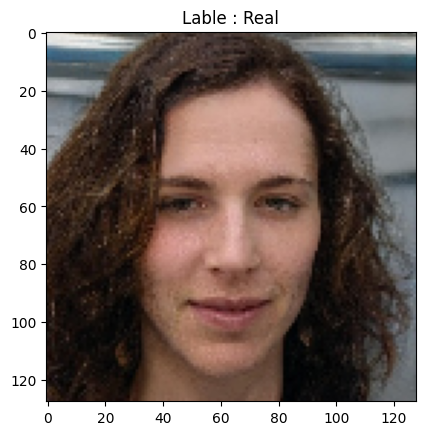

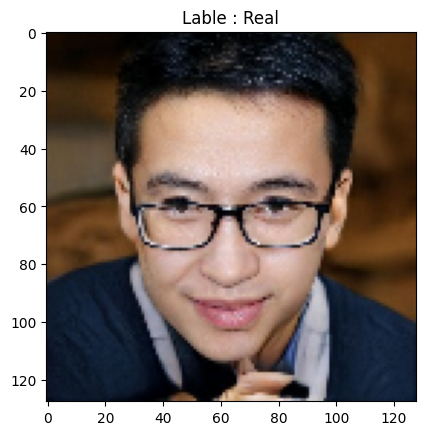

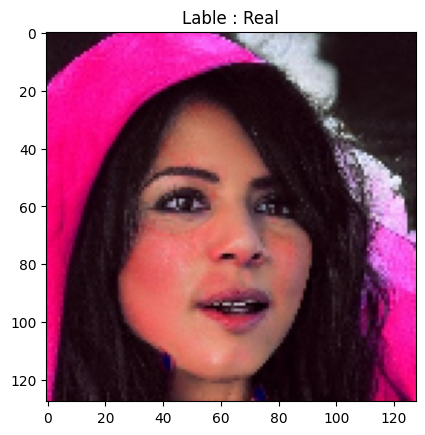

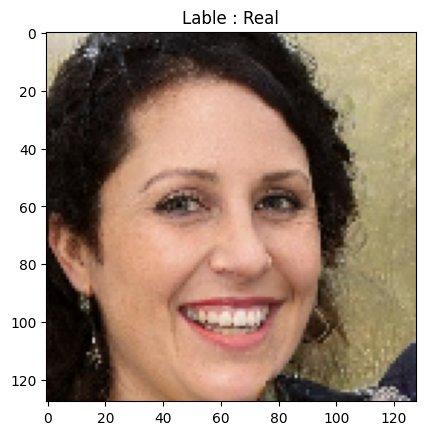

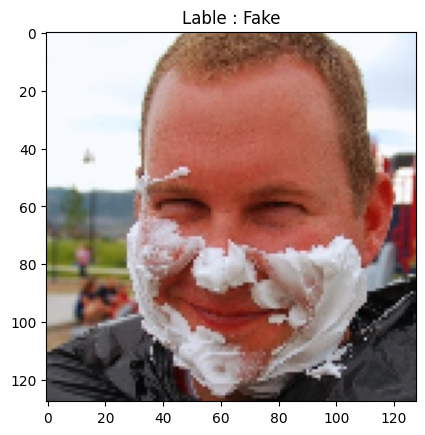

In [25]:
for images, labels in trian_generator:
    for i in range(5):
        plt.imshow(images[i])
        plt.title(f"Lable : {'Real' if labels[i]==0 else 'Fake'}")
        plt.show()

    break

In [27]:
history = model.fit(
    trian_generator,
    validation_data=valid_gen,
    epochs=5,
    steps_per_epoch = trian_generator.samples // 32,
    validation_steps = valid_gen.samples // 32
)

C:\Users\Shree\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 1917s 608ms/step - accuracy: 0.5007 - loss: 0.6969 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 2/5
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 1505s 482ms/step - accuracy: 0.5005 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 3/5
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 1856s 594ms/step - accuracy: 0.4997 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 4/5
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 1962s 628ms/step - accuracy: 0.4978 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 5/5
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 1649s 528ms/step - accuracy: 0.4988 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932


In [28]:
model.save("deepfake_detector.h5")


In [1]:
from tensorflow.keras.models import load_model

# Load the trained model

model = load_model("deepfake_detector.h5")

In [3]:
import cv2
import numpy as np

# Load an image (change the path accordingly)

img_path = "C:/Users/Shree/Desktop/DeepFake Detection System/real_vs_fake/real-vs-fake/train/fake/00B4R41FLE.jpg"
img = cv2.imread(img_path)

In [4]:
resized_img = cv2.resize(img, (128, 128))
resized_img = np.expand_dims(resized_img, axis=0)  

# Predict
prediction = model.predict(resized_img)
label = "Image is Real" if prediction[0][0] < 0.5 else "Image is Fake "

print(f"Prediction: {label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Prediction: Image is Fake 
